In [1]:
import sys
sys.path.append("../")

import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import *
from plot import LimitPlot

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
map_ebin0 = np.load('/tigress/nrodd/DM-Catalog-Scan/DataFiles/DM-Maps/Jfactor_Tully_512_map_final_smoothed_0.npy')
map_ebin12 = np.load('/tigress/nrodd/DM-Catalog-Scan/DataFiles/DM-Maps/Jfactor_Tully_512_map_final_smoothed_12.npy')
map_ebin20 = np.load('/tigress/nrodd/DM-Catalog-Scan/DataFiles/DM-Maps/Jfactor_Tully_512_map_final_smoothed_20.npy')
map_ebin39 = np.load('/tigress/nrodd/DM-Catalog-Scan/DataFiles/DM-Maps/Jfactor_Tully_512_map_final_smoothed_39.npy')

In [3]:
print np.shape(map_ebin0)
print np.mean(map_ebin0[0])
print np.shape(map_ebin39)
print np.mean(map_ebin39[39])

(40, 3145728)
1.05267921008e+14
(40, 3145728)
1.05253441136e+14


In [4]:
2*np.logspace(-1,3)[12]

1.9081909526999878

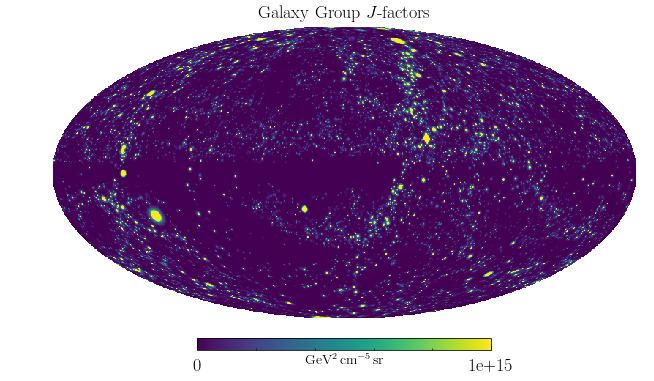

In [8]:
#hp.mollview(map_ebin0[0],title='Ebin 0',max=1e16)
# hp.mollview(map_ebin10[10],title='Ebin 10',max=1e16)
hp.mollview(map_ebin12[12],max=1e15, unit="GeV$^2\,$cm$^{-5}\,\mathrm{sr}$", title="Galaxy Group $J$-factors")
plt.savefig("../plots/jfactors.pdf")

In [23]:
hp.fitsfunc.write_map("extragalactic_jfactors_2GeVsmooth.fits",map_ebin12[12])

In [24]:
hp.fitsfunc.write_map("extragalactic_jfactors_nosmooth.fits",map_ebin39[39])

In [20]:
outmap = np.zeros((40,hp.nside2npix(128)))

for i in range(40):
#     if i == 11:
#         load = np.load('/tigress/nrodd/DM-Catalog-Scan/DataFiles/DM-Maps/Jfactor_Tully_map_final_smoothed_'+str(10)+'.npy')
#         outmap[i] = load[10]
#     elif i == 13:
#         load = np.load('/tigress/nrodd/DM-Catalog-Scan/DataFiles/DM-Maps/Jfactor_Tully_map_final_smoothed_'+str(12)+'.npy')
#         outmap[i] = load[12]
#     else:
    load = np.load('/tigress/nrodd/DM-Catalog-Scan/DataFiles/DM-Maps/Jfactor_Tully_map_final_smoothed_'+str(i)+'.npy')
    outmap[i] = load[i]

In [3]:
for i in range(40):
    print np.mean(outmap[i])/np.mean(outmap[0])

1.0
0.99993139731
0.9998931541
0.999866989794
0.999853124732
0.999834596354
0.999832717059
0.999833218831
0.999833867357
0.999837723386
0.999835681814
0.999839227882
0.999830989947
0.999849506441
0.999856530471
0.999849141093
0.999857981754
0.999884683332
0.999875728966
0.999876490356
0.999912165382
0.999913063641
0.999923850504
0.999923281701
0.999925256757
0.999925633491
0.999926194688
0.999925875363
0.999925789733
0.99992681276
0.999928226899
0.999928156491
0.999927002048
0.999927455683
0.999927485253
0.999926559578
0.999924694983
0.999924306081
0.999924829005
0.999924733927


In [5]:
np.save('/tigress/nrodd/DM-Catalog-Scan/DataFiles/DM-Maps/Jfactor_Tully_map_final_smoothed_sid.npy',outmap)